#**USA LinkedIn Jobs 2022 EDA.**
Data source- https://www.kaggle.com/datasets/cedricaubin/linkedin-data-analyst-jobs-listings

Project: Analysis of Data analyst job listings posted on linkedIn in 2022 in the United States.


**Importing necessary libraries.**

In [1]:
#Libraries necessary for reading and manipulating data.
import pandas as pd
import numpy as np
#Libraries necessary for visualization.
import matplotlib.pyplot as plt
import seaborn as sns
#Restricting the float value to 3 decimal places.
pd.set_option('display.float_format', lambda x: '%.3f' % x)


In [2]:
#Access to my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Importing dataset**

In [3]:
usa_jobs = pd.read_csv ('/content/drive/MyDrive/linkedin-jobs-usa.csv')

In [4]:
#Checking the first 5 rows
usa_jobs.head()

,title,company,onsite_remote,salary,location,Seniority,Employment Type,Job Function,Industries,posted_date
0,Data Analyst - Recent Graduate,PayPal,onsite,NaN,Buffalo-Niagara Falls Area,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",11/22/22
1,Data Analyst - Recent Graduate,PayPal,onsite,NaN,"San Jose, CA",Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",11/22/22
2,Data Analyst,PayPal,onsite,NaN,"Texas, United States",Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",11/17/22
3,Data Analyst,PayPal,onsite,NaN,"Illinois, United States",Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",11/17/22
4,Entry-Level Data Analyst,The Federal Savings Bank,onsite,NaN,"Chicago, Illinois",Entry level,Full-time,Information Technology,Savings Institutions,11/17/22


In [5]:
#checking the last 5 rows.
usa_jobs.tail()

,title,company,onsite_remote,salary,location,Seniority,Employment Type,Job Function,Industries,posted_date
2840,Junior Data Analyst,Iris Software Inc.,hybrid,NaN,"Texas, United States",Mid-Senior level,Contract,Information Technology,IT Services and IT Consulting,10/21/22
2841,Data Analyst (SQL),Marwood Group,hybrid,"$75,000.00\r\n -\r\n $95...",New York City Metropolitan Area,Mid-Senior level,Full-time,"Consulting, General Business, and Strategy/Pla...",Financial Services,10/26/22
2842,Data Analyst,SmartSense by Digi,hybrid,NaN,"Mishawaka, IN",Associate,Full-time,Engineering,"IT Services and IT Consulting, Software Develo...",11/17/22
2843,Data Analyst,Synergy Search,hybrid,"$85,000.00\r\n -\r\n $95...",NashvIllinoisle Metropolitan Area,Not Applicable,Full-time,Analyst and Finance,Entertainment Providers,11/14/22
2844,Data Analyst,Insight Global,hybrid,"$130,000.00\r\n -\r\n $1...","Burbank, CA",Mid-Senior level,Full-time,Information Technology,Entertainment Providers and Hospitals and Heal...,11/14/22


* There are missing values in the Salary column.

In [6]:
#checking the data types of the columns for the dataset.
usa_jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            2845 non-null   object
 1   company          2845 non-null   object
 2   onsite_remote    2845 non-null   object
 3   salary           929 non-null    object
 4   location         2845 non-null   object
 5   Seniority        2653 non-null   object
 6   Employment Type  2799 non-null   object
 7   Job Function     2653 non-null   object
 8   Industries       2652 non-null   object
 9   posted_date      2845 non-null   object
dtypes: object(10)
memory usage: 222.4+ KB


* All columns are of object type.

In [7]:
#converting posted_date data type to date_time
usa_jobs['posted_date']=pd.to_datetime(usa_jobs['posted_date'])
usa_jobs['posted_date'].dtypes

dtype('<M8[ns]')

In [8]:
#checking for duplicates
usa_jobs.duplicated().sum()

2591

* There are 2591 dupiplicated rows.

In [9]:
#checking which rows are duplicated
usa_jobs.loc[usa_jobs.duplicated(keep='first'),:]

,title,company,onsite_remote,salary,location,Seniority,Employment Type,Job Function,Industries,posted_date
25,Data Analyst - Recent Graduate,PayPal,onsite,NaN,Buffalo-Niagara Falls Area,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",2022-11-22
27,Data Analyst - Recent Graduate,PayPal,onsite,NaN,"San Jose, CA",Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",2022-11-22
28,Data Analyst,PayPal,onsite,NaN,"Texas, United States",Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",2022-11-17
29,Data Analyst,PayPal,onsite,NaN,"Illinois, United States",Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",2022-11-17
30,Entry-Level Data Analyst,The Federal Savings Bank,onsite,NaN,"Chicago, Illinois",Entry level,Full-time,Information Technology,Savings Institutions,2022-11-17
...,...,...,...,...,...,...,...,...,...,...
2839,Data Analyst,Frostbite,hybrid,NaN,"Austin, TX",Not Applicable,Full-time,"Strategy/Planning, Analyst, and Information Te...","IT Services and IT Consulting, Software Develo...",2022-11-22
2840,Junior Data Analyst,Iris Software Inc.,hybrid,NaN,"Texas, United States",Mid-Senior level,Contract,Information Technology,IT Services and IT Consulting,2022-10-21
2841,Data Analyst (SQL),Marwood Group,hybrid,"$75,000.00\r\n -\r\n $95...",New York City Metropolitan Area,Mid-Senior level,Full-time,"Consulting, General Business, and Strategy/Pla...",Financial Services,2022-10-26
2842,Data Analyst,SmartSense by Digi,hybrid,NaN,"Mishawaka, IN",Associate,Full-time,Engineering,"IT Services and IT Consulting, Software Develo...",2022-11-17


In [10]:
#checking which rows are duplicated
usa_jobs.loc[usa_jobs.duplicated(keep='last'),:]

,title,company,onsite_remote,salary,location,Seniority,Employment Type,Job Function,Industries,posted_date
0,Data Analyst - Recent Graduate,PayPal,onsite,NaN,Buffalo-Niagara Falls Area,Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",2022-11-22
1,Data Analyst - Recent Graduate,PayPal,onsite,NaN,"San Jose, CA",Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",2022-11-22
2,Data Analyst,PayPal,onsite,NaN,"Texas, United States",Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",2022-11-17
3,Data Analyst,PayPal,onsite,NaN,"Illinois, United States",Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",2022-11-17
4,Entry-Level Data Analyst,The Federal Savings Bank,onsite,NaN,"Chicago, Illinois",Entry level,Full-time,Information Technology,Savings Institutions,2022-11-17
...,...,...,...,...,...,...,...,...,...,...
2815,Junior Data Analyst,Iris Software Inc.,hybrid,NaN,"Texas, United States",Mid-Senior level,Contract,Information Technology,IT Services and IT Consulting,2022-10-21
2816,Data Analyst (SQL),Marwood Group,hybrid,"$75,000.00\r\n -\r\n $95...",New York City Metropolitan Area,Mid-Senior level,Full-time,"Consulting, General Business, and Strategy/Pla...",Financial Services,2022-10-26
2817,Data Analyst,SmartSense by Digi,hybrid,NaN,"Mishawaka, IN",Associate,Full-time,Engineering,"IT Services and IT Consulting, Software Develo...",2022-11-17
2818,Data Analyst,Insight Global,hybrid,"$130,000.00\r\n -\r\n $1...","Burbank, CA",Mid-Senior level,Full-time,Information Technology,Entertainment Providers and Hospitals and Heal...,2022-11-14


* Keeping the duplicated rows as they are because it is possible for a  companies can list the same job more that once on the same day in the same location as they might have more than one office in one city/state.

In [11]:
#statistical summary of data
usa_jobs.describe()

<ipython-input-11-f64266bfc7d0>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  usa_jobs.describe()


,title,company,onsite_remote,salary,location,Seniority,Employment Type,Job Function,Industries,posted_date
count,2845,2845,2845,929,2845,2653,2799,2653,2652,2845
unique,37,171,3,45,112,5,4,53,77,33
top,Data Analyst,PayPal,remote,$50.00\r\n -\r\n $60.00,United States,Mid-Senior level,Full-time,Information Technology,"Software Development, Technology, Information ...",2022-11-17 00:00:00
freq,2110,499,970,89,632,855,2144,1614,489,419
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-08-12 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-23 00:00:00


In [12]:
usa_jobs.shape

(2845, 10)

* the dataset has 2845 rows and 10 columns.

In [13]:
#Checking for columns
usa_jobs.columns

Index(['title', 'company', 'onsite_remote', 'salary', 'location', 'Seniority',
       'Employment Type', 'Job Function', 'Industries', 'posted_date'],
      dtype='object')

In [14]:
#changing names of columns.
usa_jobs.rename(columns={'Employment Type':'employment_type','Job Function':'job_function'},inplace=True)
usa_jobs.columns

Index(['title', 'company', 'onsite_remote', 'salary', 'location', 'Seniority',
       'employment_type', 'job_function', 'Industries', 'posted_date'],
      dtype='object')

In [15]:
#checking for missing values.
usa_jobs.isnull().sum()

title                 0
company               0
onsite_remote         0
salary             1916
location              0
Seniority           192
employment_type      46
job_function        192
Industries          193
posted_date           0
dtype: int64

* There is missing data in the salary,seniority, employment type, job function and industries columns.
* It is not rare for companies not to include salaries or to be vague in their job descriptions therefore we will leave the missing value in the dataset as is.

### **Analysis**

**Total number of companies**

In [16]:
#checking the total number of unique values in the company column
usa_jobs['company'].nunique()

171

* There is a total of  171 different companies in the dataset.

**Top 10 companies by listings**

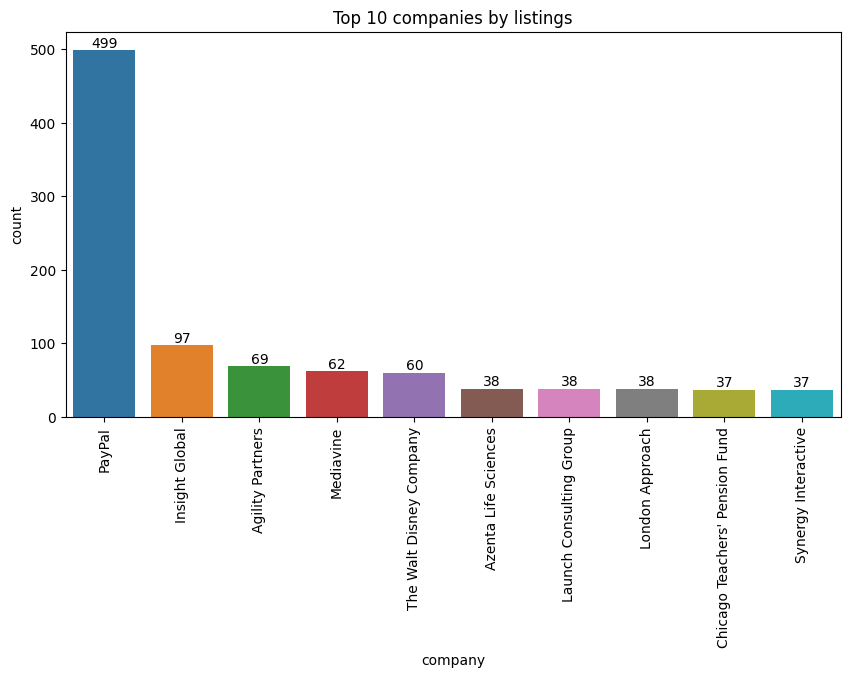

In [17]:
plt.figure(figsize=(10,5))
company=sns.countplot(data=usa_jobs,x='company',order=usa_jobs.company.value_counts().iloc[:10].index)
company.bar_label(company.containers[0])
plt.xticks(rotation=90)
plt.title('Top 10 companies by listings')
plt.show()

* PayPal had the most jobs listings in 2022  with a total of 499 job listings.

**Analyzing Paypal job listings.**

In [18]:
Paypal=usa_jobs[usa_jobs['company']== 'PayPal']
Paypal.describe()

<ipython-input-18-9ba76a2877ec>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  Paypal.describe()


,title,company,onsite_remote,salary,location,Seniority,employment_type,job_function,Industries,posted_date
count,499,499,499,0,499,489,489,489,489,499
unique,2,1,1,0,16,1,1,1,1,3
top,Data Analyst,PayPal,onsite,NaN,"Timonium, MD",Not Applicable,Full-time,Information Technology,"Software Development, Technology, Information ...",2022-11-17 00:00:00
freq,316,499,499,NaN,61,489,489,489,489,267
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-16 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-22 00:00:00


* All jobs listed by PayPal are onsite.
* PayPal did not list the salary that they were offering.
* PayPal did not specify their seniority level requirement as it they listed it as Not Applicable.
* Paypal job listings are only under the Information Technology job function.
* Paypal is looking for candidates  in 16 locations.
* PayPal listed their jobs on 3 different days in the month of November only.
* Paypal job listings are only full time.

**PayPal job listings by location.**

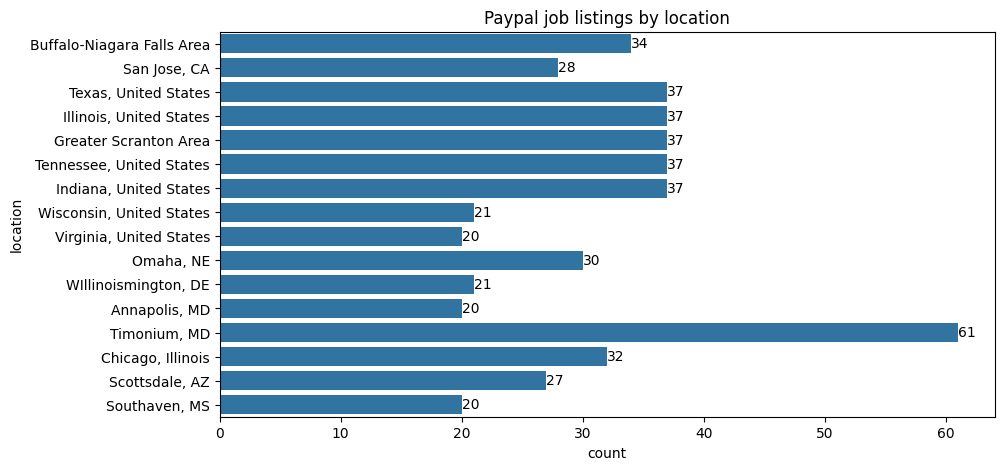

In [19]:
plt.figure(figsize=(10,5))
pp_location=sns.countplot(data=Paypal,y='location',color='tab:blue')
pp_location.bar_label(pp_location.containers[0])
plt.title('Paypal job listings by location')
plt.show()

* Paypal listed 20 or more jobs in each of the 16 locations with the most being in Timonium, MD with 61 listings.

**Paypal listings by title.**

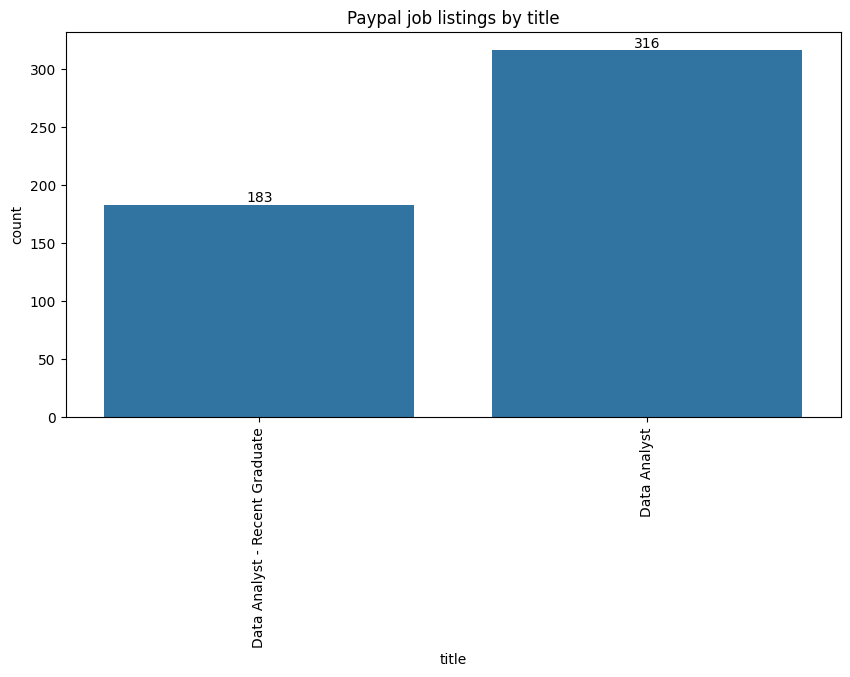

In [20]:
plt.figure(figsize=(10,5))
pp_location=sns.countplot(data=Paypal,x='title',color='tab:blue')
pp_location.bar_label(pp_location.containers[0])
plt.title('Paypal job listings by title')
plt.xticks(rotation=90)
plt.show()

* 183 of Paypal's job listings are looking for a recent graduate.

**Overall- Months jobs were listed.**




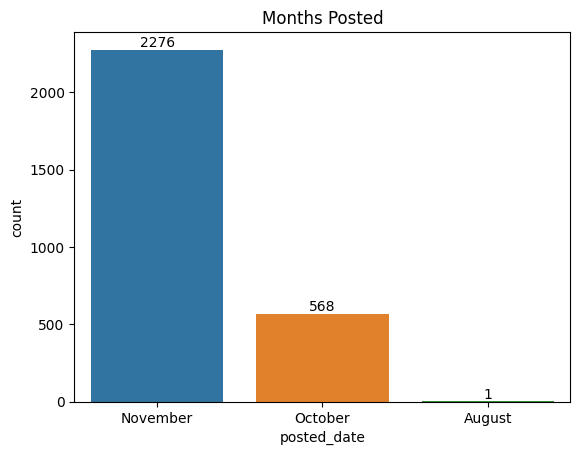

In [21]:
months=usa_jobs['posted_date'].dt.month_name()
m= sns.countplot(data=usa_jobs,x=months)
m.bar_label(m.containers[0])
plt.title('Months Posted')
plt.show()

* The dataset contains only jobs listed in the months of November, October and August.
* Majority of the jobs were listed in the month of November which has a total of 2276 job listings.
* Only one job was listed in August.

**Overall- Days jobs were listed.**

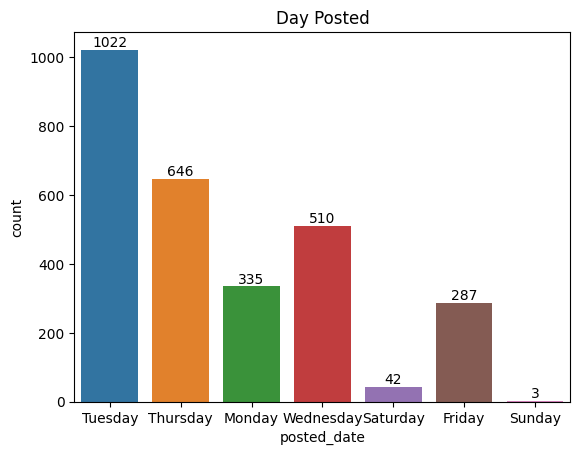

In [22]:
days=usa_jobs['posted_date'].dt.day_name()
d= sns.countplot(data=usa_jobs,x=days)
d.bar_label(d.containers[0])
plt.title('Day Posted')
plt.show()

* Most of the Jobs were posted on Tuesday as it has a total 1022 job listings
* The least number of jobs were posted on Sunday with only 3 jobs listings

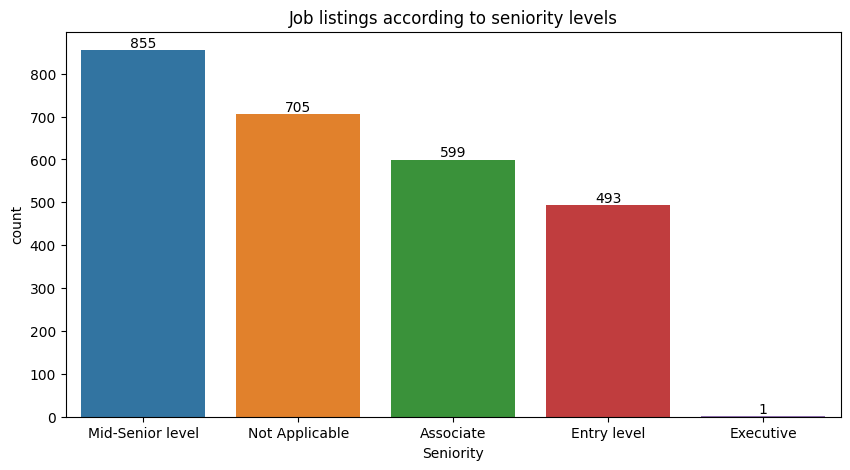

In [23]:
plt.figure(figsize=(10,5))
levels=sns.countplot(data=usa_jobs,x='Seniority',order=usa_jobs.Seniority.value_counts().iloc[:].index)
levels.bar_label(levels.containers[0])
plt.title('Job listings according to seniority levels')
plt.show()


* 855 companies are looking for a Mid-Senior level Data Analyst which makes it the most sought after seniority level.
* The Executive level is an outlier as there is only 1 listing for it.

In [42]:
#calculating percentage of seniority levels.
usa_jobs['Seniority'].value_counts(normalize=True)

Mid-Senior level   0.322
Not Applicable     0.266
Associate          0.226
Entry level        0.186
Executive          0.000
Name: Seniority, dtype: float64

32% of the jobs listed are looking for a mid senior level data analyst.

In [24]:
#checking what job listing is looking for an executive.
Executive=usa_jobs[usa_jobs['Seniority']=='Executive']
Executive

,title,company,onsite_remote,salary,location,Seniority,employment_type,job_function,Industries,posted_date
2333,Data Analyst,The Judge Group,hybrid,NaN,"Minneapolis, MN",Executive,Contract,Engineering and Information Technology,Staffing and Recruiting,2022-11-07


* The Judge Group company is looking for an executive level data analyst. The job is hybrid and the company is based in Minneapolis.

**Job listings: Onsite_Remote**

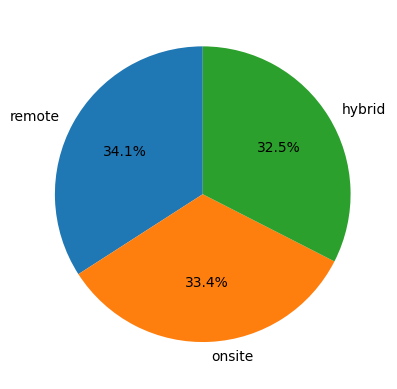

In [25]:
o_r=usa_jobs['onsite_remote'].value_counts()
plt.pie(o_r, labels=o_r.index,autopct='%1.1f%%',startangle=90)
plt.show()

* Job listings are almost equally distributed among remote, onsite and hybrid, however remote jobs are in the lead as they occupy 34.1% of the data.

**Top 10 locations by listings.**

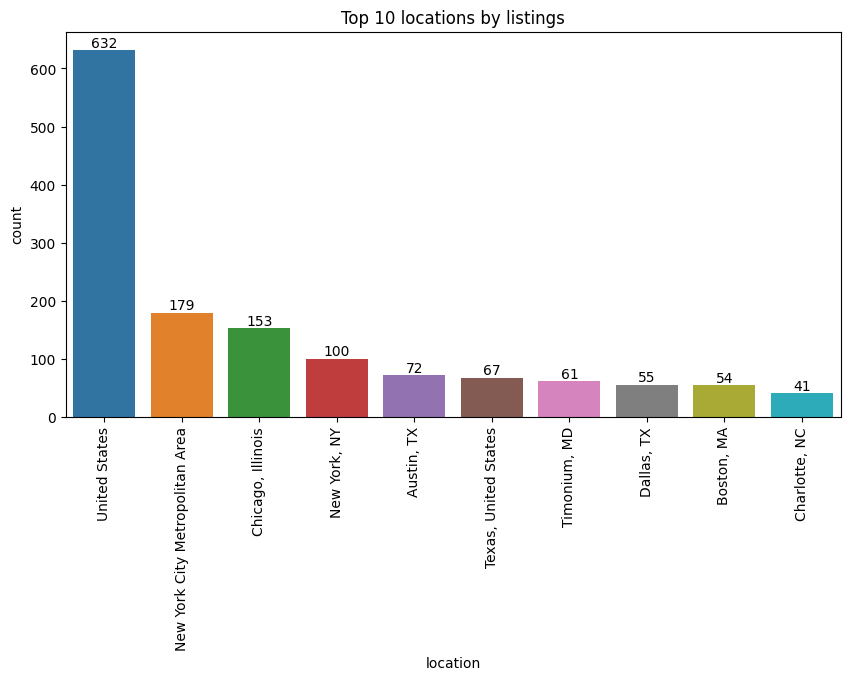

In [26]:
plt.figure(figsize=(10,5))
location=sns.countplot(data=usa_jobs,x='location',order=usa_jobs.location.value_counts().iloc[:10].index)
location.bar_label(location.containers[0])
plt.xticks(rotation=90)
plt.title('Top 10 locations by listings')
plt.show()

* 632 of the jobs listed did not specify their location and only listed it as United States which makes it the top location in the dataset.
* New York City Metropolitan Area had the most listings amongst the companies that specified their locations.
* Timonium, MD only had 61 job listings which are all from Paypal as shown in previous visualization.

**Top Industries by Listings**

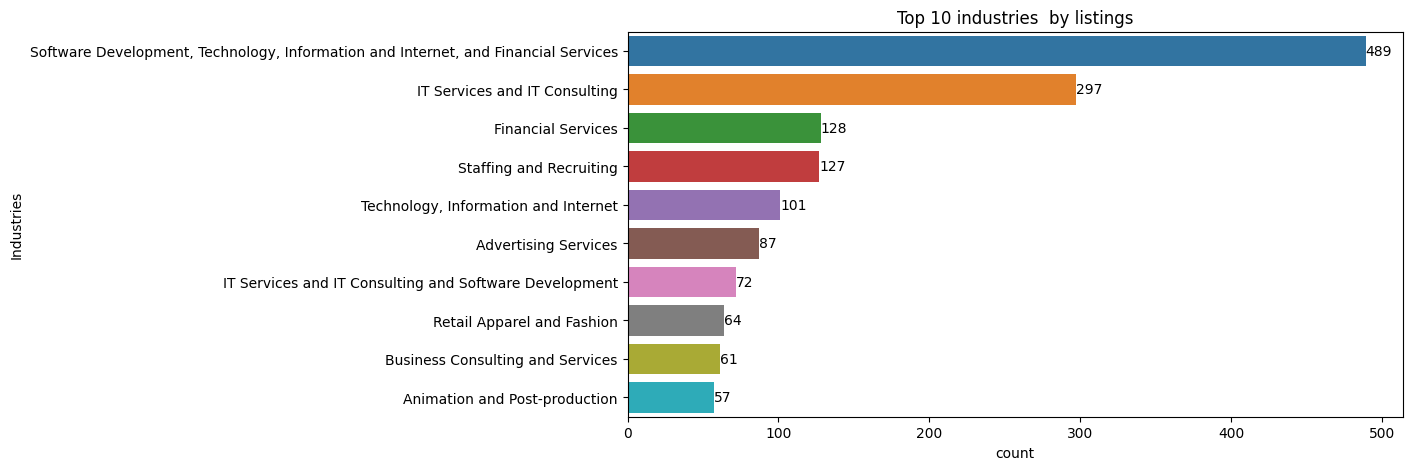

In [27]:
plt.figure(figsize=(10,5))
ind=sns.countplot(data=usa_jobs,y='Industries',order=usa_jobs.Industries.value_counts().iloc[:10].index)
ind.bar_label(ind.containers[0])
plt.title('Top 10 industries  by listings')
plt.show()

* Software Development, Technology, Information  and Internet, and Financial services has the most job listings.
* All the jobs under this industry were listed by PayPal as shown the Paypal statical summary table above.

**Top Job functions by listings**

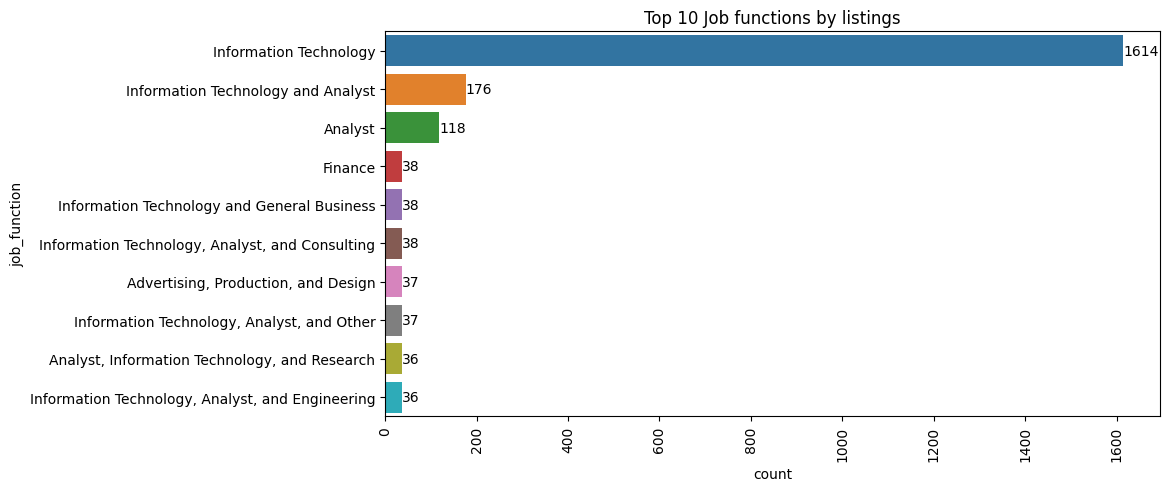

In [28]:
plt.figure(figsize=(10,5))
job=sns.countplot(data=usa_jobs,y='job_function',order=usa_jobs.job_function.value_counts().iloc[:10].index)
job.bar_label(job.containers[0])
plt.xticks(rotation=90)
plt.title('Top 10 Job functions by listings')
plt.show()

* Top job function amongst the listings is Information Technology.

**Employment type**

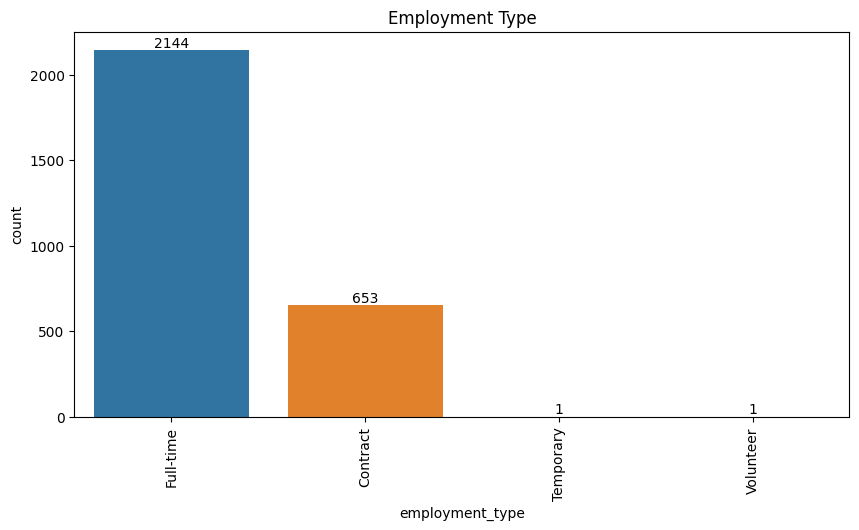

In [29]:
plt.figure(figsize=(10,5))
emp=sns.countplot(data=usa_jobs,x='employment_type')
emp.bar_label(emp.containers[0])
plt.xticks(rotation=90)
plt.title('Employment Type')
plt.show()

* Most of the jobs listed are full time jobs or contract jobs with full time being in the lead with 2114 job listings.
* Temporary and volunteer work only has 1 job listed each

In [41]:
#calculating the percentage of employment type.
usa_jobs['employment_type'].value_counts(normalize=True)

Full-time   0.766
Contract    0.233
Temporary   0.000
Volunteer   0.000
Name: employment_type, dtype: float64

* 76.6% of the job listed were full time.

In [30]:
#checking what job listing is looking for a temporary employee.
emp=usa_jobs[usa_jobs['employment_type']=='Temporary']
emp

,title,company,onsite_remote,salary,location,Seniority,employment_type,job_function,Industries,posted_date
260,Data Analyst,Kelly,onsite,NaN,"Irvine, CA",Entry level,Temporary,Information Technology,Staffing and Recruiting,2022-11-17


In [31]:
#Checking what job listing is looking for a volunteer.
vol=usa_jobs[usa_jobs['employment_type']=='Volunteer']
vol

,title,company,onsite_remote,salary,location,Seniority,employment_type,job_function,Industries,posted_date
1762,Data Analyst,Solution,remote,NaN,United States,NaN,Volunteer,NaN,NaN,2022-11-22


* Kelly company listed an temporary entry level onsite job.
* The Solution company listed a remote volunteer job.

**Observations on salary**

In [32]:
#checking missing values in the salary column.
usa_jobs['salary'].isnull().sum()

1916

* 1916 of the jobs listed did not list their salary.

In [33]:
#checking data type and count of non null values of salary.
usa_jobs['salary'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 2845 entries, 0 to 2844
Series name: salary
Non-Null Count  Dtype 
--------------  ----- 
929 non-null    object
dtypes: object(1)
memory usage: 22.4+ KB


* There are 929 non null values in the salary column and they are all object type.

In [34]:
#cleaning salary column .
#dropping null values.
salary=[]
sal=usa_jobs['salary'].dropna()

In [35]:
#splitting each terms to get 2 values.
sal=['' .join(s.split()) for s in sal]
sal=[s.split('-',1) for s in sal]

In [36]:
mini=[float(m) for m in (str(s[0]).replace('$','').replace(',','') for s in sal)]
maxi=[float(m) for m in (str(s[1]).replace('$','').replace(',','') for s in sal)]

In [37]:
minimum_salary=[ i for i in mini if i>=30000]
maximum_salary=[i for i in maxi if i>=30000]

In [38]:
#creating salary data frame
max_min=pd.DataFrame(data=zip(minimum_salary,maximum_salary),columns=['minimum_salary','maximum_salary'])
#statistical data of the salary data.
max_min.describe()

,minimum_salary,maximum_salary
count,498.000,498.000
mean,89169.197,108798.263
std,22625.837,24830.284
min,50000.000,55000.000
25%,73036.000,90000.000
50%,80000.000,105901.000
75%,100000.000,127500.000
max,130000.000,155000.000


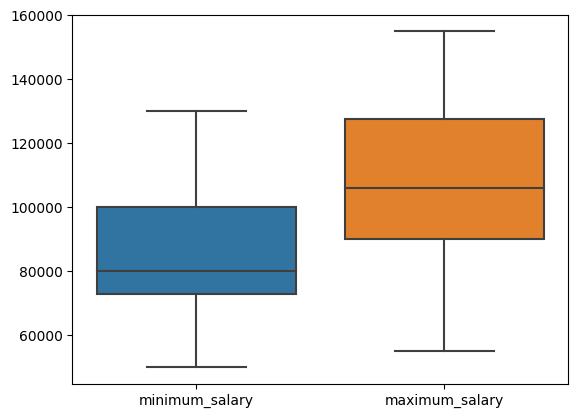

In [39]:
#visualizing the data.
sns.boxplot(data=max_min)
plt.show()

* The highest salary range offered is  130 000 - 155 000 dollars.
* The minimum salary range offered is  50000 - 55000 dollars.
* The median salary range offered is 80000 -  105901 dollars.

###**Summary of Insights .**

* There were a total of data analyst 2845 jobs listed on linkedIn U.S in 2022 according to the dataset.
* According to the dataset the jobs were posted in August, October and November. November had the most job postings.
* 1022 jobs were posted on a Tuesday which made it the top day.
* Out of the 171 companies that posted, Paypal was the top company with a total of 499 job listings.
* 632 of the jobs listed did not specify their location and just listed it as the United States. This is to no surprise as 34.1% of the jobs listed were remote making it the the most popular.
* Among the specified locations, the New York City Metropolitan area  was the most popular with a total of 179 job listings.
* The Software Development, Technology, Information and Internet and Financial services industry was the top industry.
* The top job function was Information and technology.
* 76.6% of the jobs listed were full time.
* The mid-senior level was the top sought after seniority level at 32.2%.
* Only 929 of the 2845 jobs listed stated their salary range. This is more common than not with reasons including luring more applicants, or deterring money driven applicants.
* According to the salary ranges stated, the minimum range offred was 50000-55000 dollars whereas the highest range was 130000-155000 dollars.